In [1]:
# comparing SFH from TNG with Briel Paper

In [2]:
import csv
import h5py
from hoki.constants import *
import numpy as np
import scipy.integrate
import illustris_python as il
import matplotlib.pyplot as plt

In [3]:
# make data correct shape

In [4]:
# gas sfr weighted centred on centre of original volume
SFR = []
with open('./SFR_GasSFRWeighted_LimitPos_v7.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR.append(row)

In [5]:
gSFR = [[], [], [], [], [], [], [], [], [], [], [], [], []]
for snap in range(len(SFR)):
    gSFR[0].append(float(SFR[snap][0]))
    gSFR[1].append(float(SFR[snap][1]))
    gSFR[2].append(float(SFR[snap][2]))
    gSFR[3].append(float(SFR[snap][3]))
    gSFR[4].append(float(SFR[snap][4]))
    gSFR[5].append(float(SFR[snap][5]))
    gSFR[6].append(float(SFR[snap][6]))
    gSFR[7].append(float(SFR[snap][7]))
    gSFR[8].append(float(SFR[snap][8]))
    gSFR[9].append(float(SFR[snap][9]))
    gSFR[10].append(float(SFR[snap][10]))
    gSFR[11].append(float(SFR[snap][11]))
    gSFR[12].append(float(SFR[snap][12]))

In [6]:
# gas sfr weighted centred on largest galaxy
SFR = []
with open('./SFR_GasSFRWeighted_LimitPos_v8.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR.append(row)

In [7]:
ggSFR = [[], [], [], [], [], [], [], [], [], [], [], [], []]
for snap in range(len(SFR)):
    ggSFR[0].append(float(SFR[snap][0]))
    ggSFR[1].append(float(SFR[snap][1]))
    ggSFR[2].append(float(SFR[snap][2]))
    ggSFR[3].append(float(SFR[snap][3]))
    ggSFR[4].append(float(SFR[snap][4]))
    ggSFR[5].append(float(SFR[snap][5]))
    ggSFR[6].append(float(SFR[snap][6]))
    ggSFR[7].append(float(SFR[snap][7]))
    ggSFR[8].append(float(SFR[snap][8]))
    ggSFR[9].append(float(SFR[snap][9]))
    ggSFR[10].append(float(SFR[snap][10]))
    ggSFR[11].append(float(SFR[snap][11]))
    ggSFR[12].append(float(SFR[snap][12]))

In [8]:
# stellar centred on centre of original volume
SFR = []
with open('./SFR_Stellar_LimitPos_v7.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR.append(row)

In [9]:
sSFR = [[], [], [], [], [], [], [], [], [], [], [], [], []]
for snap in range(len(SFR)):
    sSFR[0].append(float(SFR[snap][0]))
    sSFR[1].append(float(SFR[snap][1]))
    sSFR[2].append(float(SFR[snap][2]))
    sSFR[3].append(float(SFR[snap][3]))
    sSFR[4].append(float(SFR[snap][4]))
    sSFR[5].append(float(SFR[snap][5]))
    sSFR[6].append(float(SFR[snap][6]))
    sSFR[7].append(float(SFR[snap][7]))
    sSFR[8].append(float(SFR[snap][8]))
    sSFR[9].append(float(SFR[snap][9]))
    sSFR[10].append(float(SFR[snap][10]))
    sSFR[11].append(float(SFR[snap][11]))
    sSFR[12].append(float(SFR[snap][12]))

In [10]:
# stellar centred on largest galaxy
SFR = []
with open('./SFR_Stellar_LimitPos_v8.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR.append(row)

In [11]:
ssSFR = [[], [], [], [], [], [], [], [], [], [], [], [], []]
for snap in range(len(SFR)):
    ssSFR[0].append(float(SFR[snap][0]))
    ssSFR[1].append(float(SFR[snap][1]))
    ssSFR[2].append(float(SFR[snap][2]))
    ssSFR[3].append(float(SFR[snap][3]))
    ssSFR[4].append(float(SFR[snap][4]))
    ssSFR[5].append(float(SFR[snap][5]))
    ssSFR[6].append(float(SFR[snap][6]))
    ssSFR[7].append(float(SFR[snap][7]))
    ssSFR[8].append(float(SFR[snap][8]))
    ssSFR[9].append(float(SFR[snap][9]))
    ssSFR[10].append(float(SFR[snap][10]))
    ssSFR[11].append(float(SFR[snap][11]))
    ssSFR[12].append(float(SFR[snap][12]))

In [12]:
# determine redshifts and lookback time

In [13]:
basePath = './sims.TNG/TNG100-1/output/'

In [14]:
il.groupcat.loadHeader(basePath, 99)['BoxSize']

75000.0

In [15]:
snapshots = np.linspace(1, 100, 99, endpoint=False).tolist()
redshifts = []
for snap in snapshots:
    redshifts.append(il.groupcat.loadHeader(basePath, snap)['Redshift'])
redshifts = redshifts[:-1]
redshifts.append(int(0))

In [16]:
def lookback(z, omega_M, omega_L, h):
    '''
    Calculates the lookback time according to a specific cosmology.

    Parameters:
    z : float
        The redshift at which the lookback time is to be calculated
    omega_M : float
        The matter density parameter (0.30897)
    omega_L : float
        The dark energy density parameter (0.6911)
    h : float
        The hubble parameter (0.6774)
    '''
    def f(x):
        a = np.sqrt(omega_M*(1+x)**3 + omega_L)
        return 1/((1+x)*a)
    t_hubble = (1/(100*h))*3.0856776*10**19
    return t_hubble*scipy.integrate.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

In [17]:
LB_time = []
for z in redshifts:
    LB_time.append(lookback(z, 0.3111, 0.6889, 0.6766))

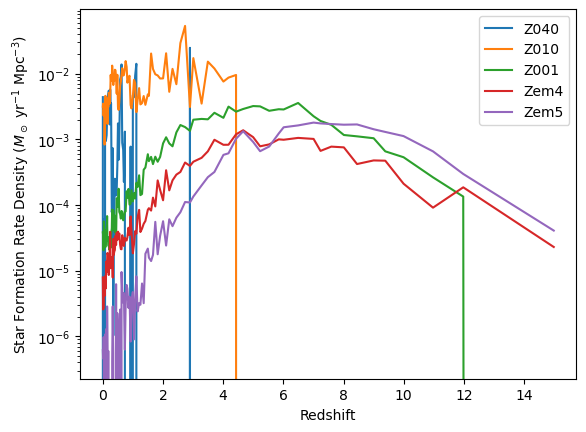

In [18]:
# SFH data (gas sfr weighted metallicity) against redshift (similar to Figure4 in Briel paper)

plt.plot(redshifts, gSFR[0], label='Z040')
plt.plot(redshifts, gSFR[4], label='Z010')
plt.plot(redshifts, gSFR[10], label='Z001')
plt.plot(redshifts, gSFR[11], label='Zem4')
plt.plot(redshifts, gSFR[12], label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

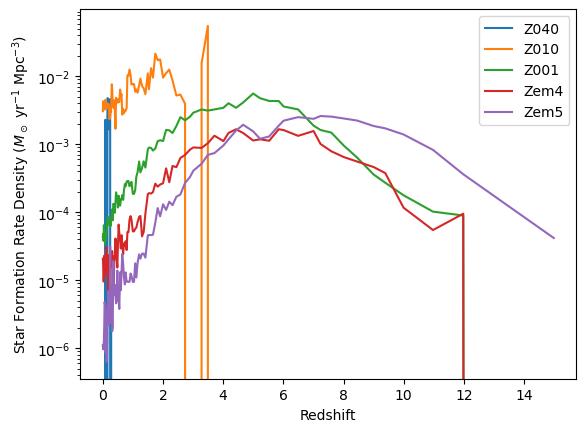

In [19]:
# SFH data (stellar metallicity) against redshift (similar to Figure4 in Briel paper)

plt.plot(redshifts, sSFR[0], label='Z040')
plt.plot(redshifts, sSFR[4], label='Z010')
plt.plot(redshifts, sSFR[10], label='Z001')
plt.plot(redshifts, sSFR[11], label='Zem4')
plt.plot(redshifts, sSFR[12], label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [20]:
# comparing with the Briel data/plot

In [21]:
data = h5py.File('./data.h5', 'r')
SFH = data["SFH"]
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

(0.0, 15.0)

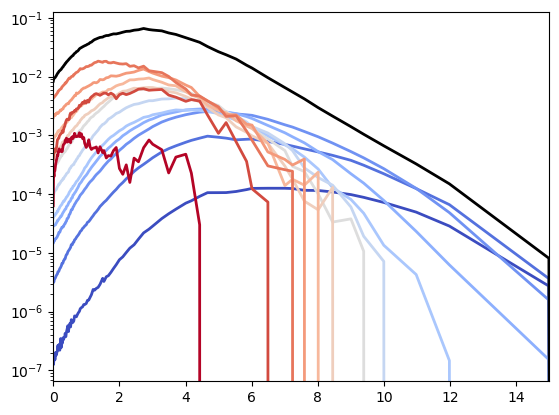

In [22]:
cmap = plt.get_cmap("coolwarm", len(BPASS_METALLICITIES))
for i, Z in enumerate(BPASS_METALLICITIES):
    plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][i], color=cmap(i), lw=2)
plt.plot(SFH['TNG'].attrs["redshift"], np.sum(SFH["TNG"], axis=0), color='black', lw=2)
plt.yscale('log')
plt.xlim(0, 15)

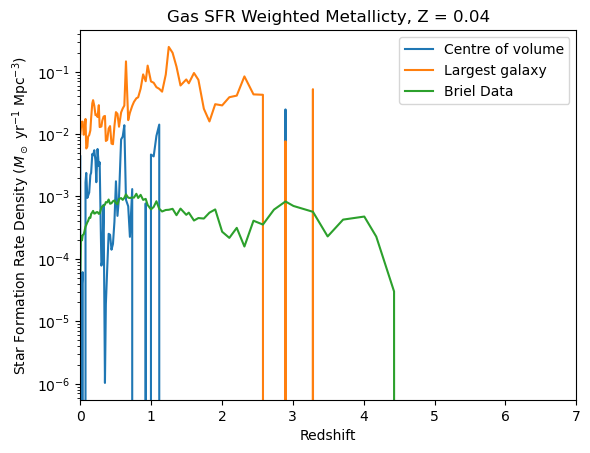

In [23]:
plt.plot(redshifts, gSFR[0], label='Centre of volume')
plt.plot(redshifts, ggSFR[0], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][12], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 7)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Gas SFR Weighted Metallicty, Z = 0.04')
plt.legend()

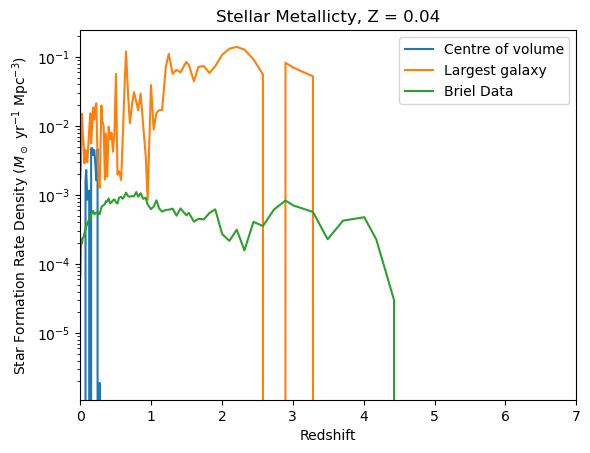

In [24]:
plt.plot(redshifts, sSFR[0], label='Centre of volume')
plt.plot(redshifts, ssSFR[0], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][12], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 7)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Stellar Metallicty, Z = 0.04')
plt.legend()

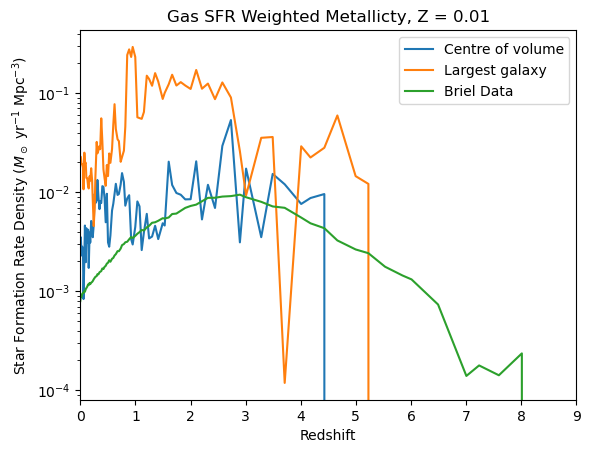

In [25]:
plt.plot(redshifts, gSFR[4], label='Centre of volume')
plt.plot(redshifts, ggSFR[4], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][8], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Gas SFR Weighted Metallicty, Z = 0.01')
plt.legend()

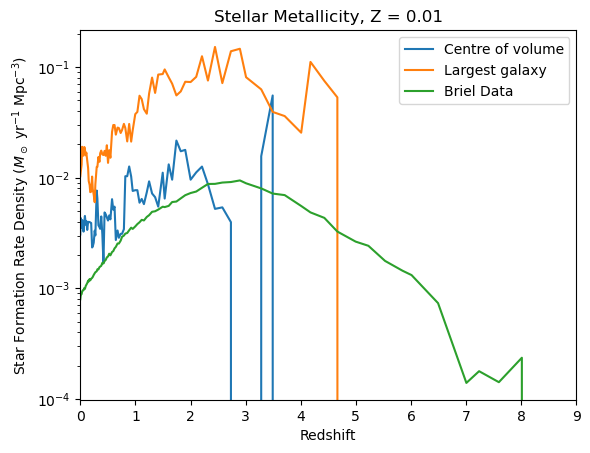

In [26]:
plt.plot(redshifts, sSFR[4], label='Centre of volume')
plt.plot(redshifts, ssSFR[4], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][8], label='Briel Data')
plt.yscale('log')
plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Stellar Metallicity, Z = 0.01')
plt.legend()

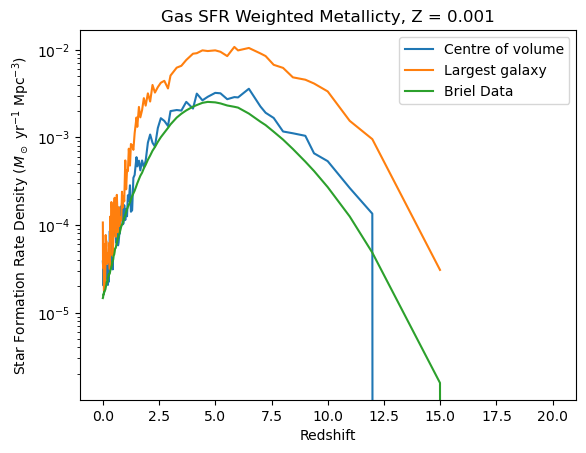

In [27]:
plt.plot(redshifts, gSFR[10], label='Centre of volume')
plt.plot(redshifts, ggSFR[10], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][2], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Gas SFR Weighted Metallicty, Z = 0.001')
plt.legend()

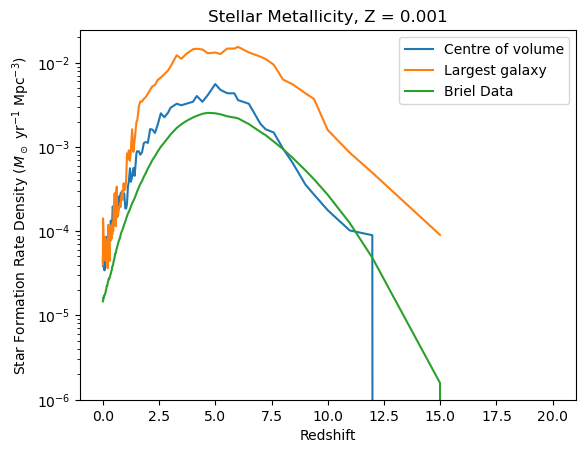

In [28]:
plt.plot(redshifts, sSFR[10], label='Centre of volume')
plt.plot(redshifts, ssSFR[10], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][2], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Stellar Metallicity, Z = 0.001')
plt.legend()

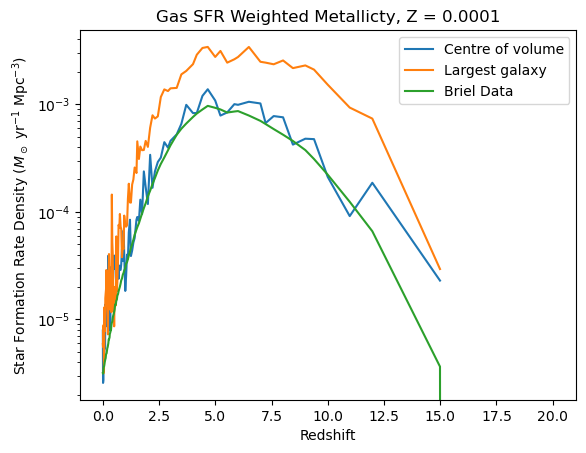

In [29]:
plt.plot(redshifts, gSFR[11], label='Centre of volume')
plt.plot(redshifts, ggSFR[11], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][1], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Gas SFR Weighted Metallicty, Z = 0.0001')
plt.legend()

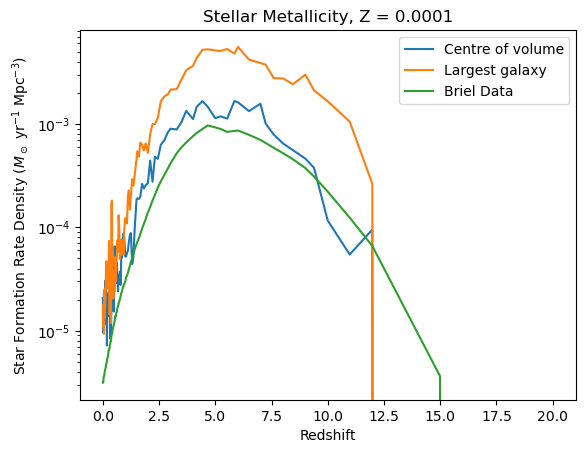

In [30]:
plt.plot(redshifts, sSFR[11], label='Centre of volume')
plt.plot(redshifts, ssSFR[11], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][1], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Stellar Metallicity, Z = 0.0001')
plt.legend()

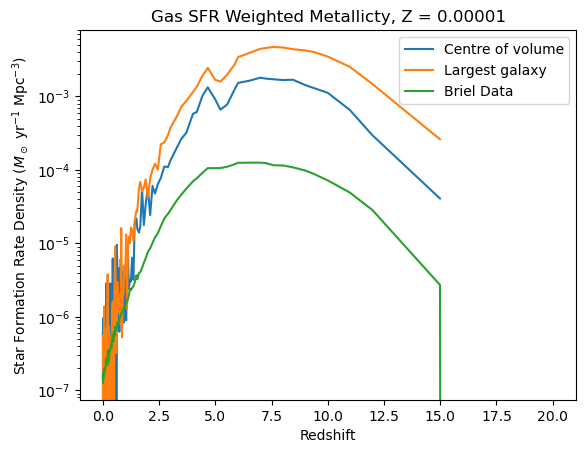

In [31]:
plt.plot(redshifts, gSFR[12], label='Centre of volume')
plt.plot(redshifts, ggSFR[12], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][0], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Gas SFR Weighted Metallicty, Z = 0.00001')
plt.legend()

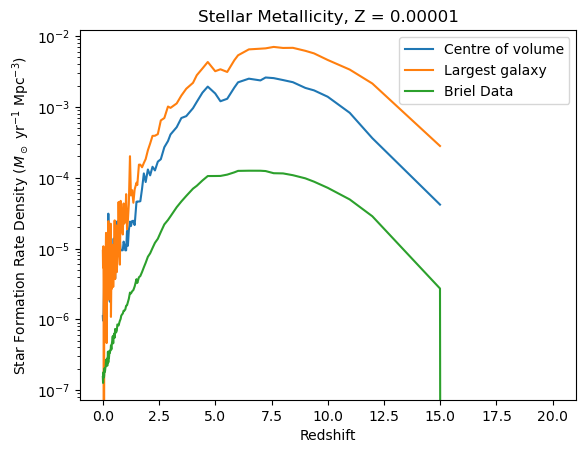

In [32]:
plt.plot(redshifts, sSFR[12], label='Centre of volume')
plt.plot(redshifts, ssSFR[12], label='Largest galaxy')
plt.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][0], label='Briel Data')
plt.yscale('log')
#plt.xlim(0, 9)
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.title('Stellar Metallicity, Z = 0.00001')
plt.legend()

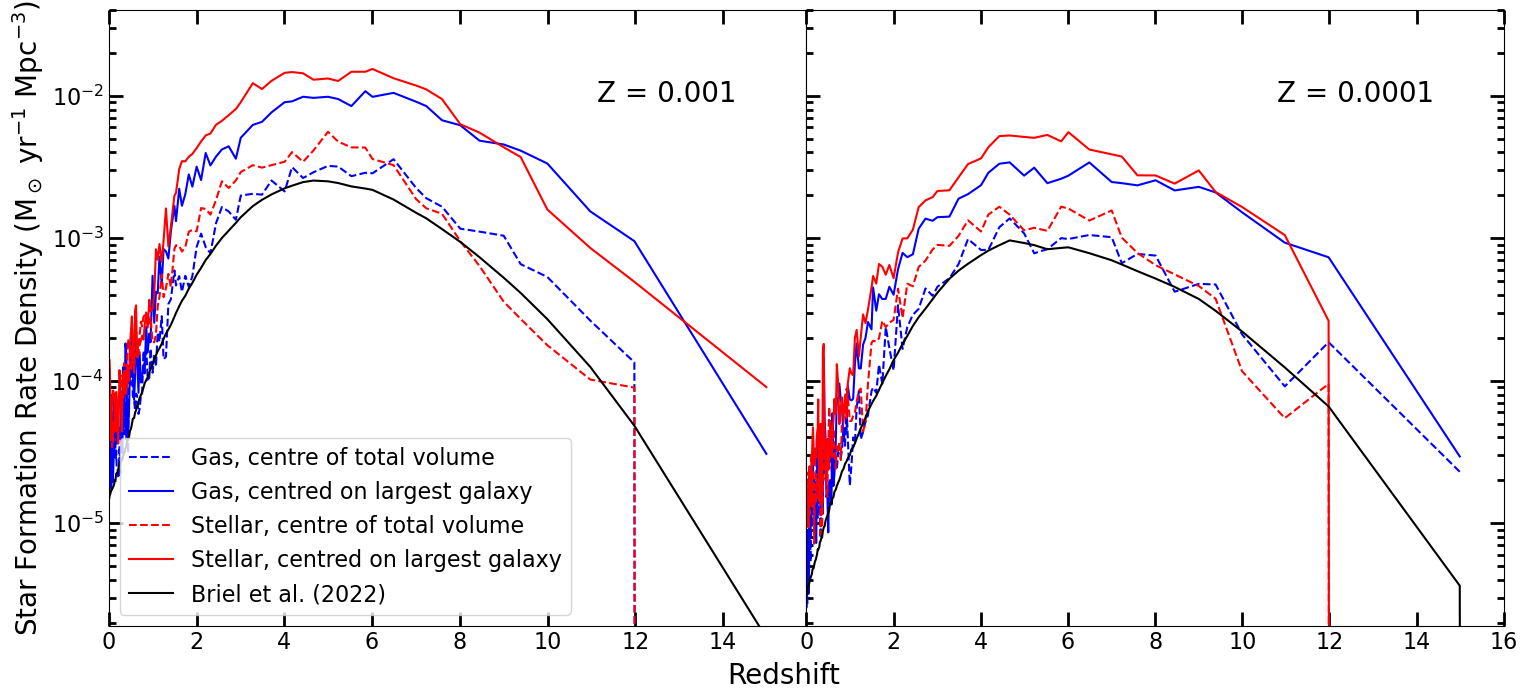

In [42]:
# plots for preliminary report

fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plt.subplots_adjust(wspace=0)

ax = axes[0]
ax2 = axes[1]

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
#ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in')
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
#ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=16)
#ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.yaxis.set_tick_params(labelleft=False)

ax.plot(redshifts, gSFR[10], label='Gas, centre of total volume', color='b', linestyle='dashed')
ax.plot(redshifts, ggSFR[10], label='Gas, centred on largest galaxy', color='b')
ax.plot(redshifts, sSFR[10], label='Stellar, centre of total volume', color='r', linestyle='dashed')
ax.plot(redshifts, ssSFR[10], label='Stellar, centred on largest galaxy', color='r')
ax.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][2], label='Briel et al. (2022)', color='k')
ax.set_yscale('log')
ax.set_xlim(0, 15.9)
ax.set_ylim(1.9e-6, 4e-2)
ax.set_ylabel('Star Formation Rate Density (M$_\odot$ yr$^{-1}$ Mpc$^{-3}$)', fontsize=20)

ax2.plot(redshifts, gSFR[11], label='Gas, centre of total volume', color='b', linestyle='dashed')
ax2.plot(redshifts, ggSFR[11], label='Gas, centred on largest galaxy', color='b')
ax2.plot(redshifts, sSFR[11], label='Stellar, centre of total volume', color='r', linestyle='dashed')
ax2.plot(redshifts, ssSFR[11], label='Stellar, centred on largest galaxy', color='r')
ax2.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][1], label='Briel et al. (2022)', color='k')
ax2.set_yscale('log')
ax2.set_xlim(0, 16)
ax2.set_ylim(1.9e-6, 4e-2)

fig.text(0.5, 0.03, r"Redshift", ha="center", va="bottom", fontsize=20)
ax.text(0.9, 0.85, r"Z = 0.001", horizontalalignment='right', transform=ax.transAxes, fontsize=20)
ax2.text(0.9, 0.85, r"Z = 0.0001", horizontalalignment='right', transform=ax2.transAxes, fontsize=20)
ax.legend(loc=3, fontsize=16)